In [70]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [71]:
img = cv2.imread('/content/drive/MyDrive/input.png')  
height, width, channels = np.shape(img)



## Initialization and distance function

In [72]:
def initialize_means(img, clusters):
      
    # reshaping input into a 2d matrix
    points = np.reshape(img, (height * width, channels)) 
    m, n = points.shape
  
    # Save center points in a np array 
    means = np.zeros((clusters, n)) 
  
    # random initialization of clusters 
    for i in range(clusters):
        rand1 = int(np.random.random(1)*clusters)
        rand2 = int(np.random.random(1)*clusters)
        means[i, 0] = points[rand1, 0]
        means[i, 1] = points[rand2, 1]
    return points, means

#Euclidean distance
def distance(x1, y1, x2, y2):
      
    dist = np.square(x1 - x2) + np.square(y1 - y2)
    dist = np.sqrt(dist)
  
    return dist

## K-means algorithm and save image

In [73]:
def k_means(points, means, clusters):
  
    iterations = 10
    m, n = points.shape
      
    index = np.zeros(m) 
  
    # k-means algorithm - set default iteration = 10
    # run through each pixel and assign closest color to each pixel

    for i in range(iterations):

          for j in range(len(points)):

            #initialize a value and a temp for distance comparison
            value = 1000
            temp = None            
            for k in range(clusters):                  
                x1 = points[j, 0]
                y1 = points[j, 1]
                x2 = means[k, 0]
                y2 = means[k, 1]
                  
                if(distance(x1, y1, x2, y2) < value):         
                    value = distance(x1, y1, x2, y2)
                    temp = k
                    index[j] = k 
          
          for k in range(clusters):              
            sum_x = 0
            sum_y = 0
            count = 0              
            for j in range(len(points)):                  
                if(index[j] == k):
                    sum_x += points[j, 0]
                    sum_y += points[j, 1] 
                    count += 1
              
            if(count == 0):
                count = 1               
            means[k, 0] = float(sum_x / count)
            means[k, 1] = float(sum_y / count)    
    return means, index
  
  
def save_image(means, index, img):
  
    center = np.array(means)
    img2 = center[index.astype(int), :]    

    # restore img to original shape
    img2 = np.reshape(img2, (height, width, channels))  

    # save the compressed image
    cv2.imwrite(str(clusters) + '_colors.png', img2)    
    cv2_imshow(img2)
    cv2.waitKey(0)

## EXECUTE CODE

Enter the number of clusters for the image:
6


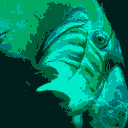

In [75]:
clusters = int(input('Enter the number of clusters for the image:\n'))

points, means = initialize_means(img, clusters)
means, index = k_means(points, means, clusters)
save_image(means, index, img)

    